# Regressao Linear - Açudes da Paraíba 
## Época da seca - até Março 2017 - Boqueirão
#### http://www.aesa.pb.gov.br/aesa-website/monitoramento/volume-acude/?id_acude=531
#### http://www.aesa.pb.gov.br/aesa-website/monitoramento/volume-diario/?tipo=atual

## Nome: João Emanuel da Silva Lins
## Matricula: 162080263
## Nome do Açude: Açude de Cordeiro

In [44]:
import pandas as pd

## Leitura do dataset
## Acude de Cordeiro - Previsão de Seca - 31/01/2008 ate 31/03/2017

In [45]:
# Acude de Boqueirão com Recarga do Rio São Francisco - 31/01/2008 ate 31/03/2017
df = pd.read_csv("AESA - Cordeiro.csv")
df.head()

,Açude,Data do registro,Volume (%),Volume (m³),Afluência/Defluência (m²)
0,Cordeiro,31/12/2012,"36,15","25.293.451,25","-55.938,75"
1,Cordeiro,30/11/2012,"38,63","27.027.552,50","-55.938,75"
2,Cordeiro,31/10/2012,"41,46","29.011.247,50","-64.741,25"
3,Cordeiro,30/09/2012,"44,24",30.953.485,"-64.741,25"
4,Cordeiro,31/08/2012,"46,74","32.701.498,75","-64.741,25"


In [46]:
del df["Açude"]
df.head(10)

,Data do registro,Volume (%),Volume (m³),Afluência/Defluência (m²)
0,31/12/2012,"36,15","25.293.451,25","-55.938,75"
1,30/11/2012,"38,63","27.027.552,50","-55.938,75"
2,31/10/2012,"41,46","29.011.247,50","-64.741,25"
3,30/09/2012,"44,24",30.953.485,"-64.741,25"
4,31/08/2012,"46,74","32.701.498,75","-64.741,25"
5,31/07/2012,"49,10",34.355.240,"-73.543,75"
6,30/06/2012,"51,21",35.826.115,0
7,31/05/2012,"53,10","37.149.902,50","-73.543,75"
8,30/04/2012,"55,62","38.914.952,50","-73.543,75"
9,31/03/2012,"58,35",40.827.090,"-73.543,75"


In [47]:
df.tail()

,Data do registro,Volume (%),Volume (m³),Afluência/Defluência (m²)
45,29/07/2015,"2,86",2.003.815,0
46,17/06/2015,"3,68","2.576.844,20",0
47,27/05/2015,"4,20","2.935.266,20",0
48,03/02/2016,"0,49","345.653,10",0
49,20/01/2016,"0,49","345.653,10",0


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
Data do registro             50 non-null object
Volume (%)                   50 non-null object
Volume (m³)                  50 non-null object
Afluência/Defluência (m²)    50 non-null object
dtypes: object(4)
memory usage: 1.7+ KB


In [49]:
# converter atributo para data
df['Data do registro'] =  pd.to_datetime( df['Data do registro'], format="%d/%m/%Y") 
df.head()

,Data do registro,Volume (%),Volume (m³),Afluência/Defluência (m²)
0,2012-12-31,"36,15","25.293.451,25","-55.938,75"
1,2012-11-30,"38,63","27.027.552,50","-55.938,75"
2,2012-10-31,"41,46","29.011.247,50","-64.741,25"
3,2012-09-30,"44,24",30.953.485,"-64.741,25"
4,2012-08-31,"46,74","32.701.498,75","-64.741,25"


In [50]:
# colocar a data como indice para fazer uma série temporal
df2 = df.set_index(pd.DatetimeIndex(df['Data do registro']))
del df2['Data do registro']
df2.head()

,Volume (%),Volume (m³),Afluência/Defluência (m²)
Data do registro,,,
2012-12-31,"36,15","25.293.451,25","-55.938,75"
2012-11-30,"38,63","27.027.552,50","-55.938,75"
2012-10-31,"41,46","29.011.247,50","-64.741,25"
2012-09-30,"44,24",30.953.485,"-64.741,25"
2012-08-31,"46,74","32.701.498,75","-64.741,25"


In [51]:
#del df2["Açude"]
df2.describe()

,Volume (%),Volume (m³),Afluência/Defluência (m²)
count,50,50,50
unique,48,48,10
top,"0,49","345.653,10",0
freq,3,3,25


In [52]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 50 entries, 2012-12-31 to 2016-01-20
Data columns (total 3 columns):
Volume (%)                   50 non-null object
Volume (m³)                  50 non-null object
Afluência/Defluência (m²)    50 non-null object
dtypes: object(3)
memory usage: 1.6+ KB


In [53]:
#del df2["Açude"]
#del df2["Data do registro"]
df2.head()

,Volume (%),Volume (m³),Afluência/Defluência (m²)
Data do registro,,,
2012-12-31,"36,15","25.293.451,25","-55.938,75"
2012-11-30,"38,63","27.027.552,50","-55.938,75"
2012-10-31,"41,46","29.011.247,50","-64.741,25"
2012-09-30,"44,24",30.953.485,"-64.741,25"
2012-08-31,"46,74","32.701.498,75","-64.741,25"


## Plota dados da época da seca

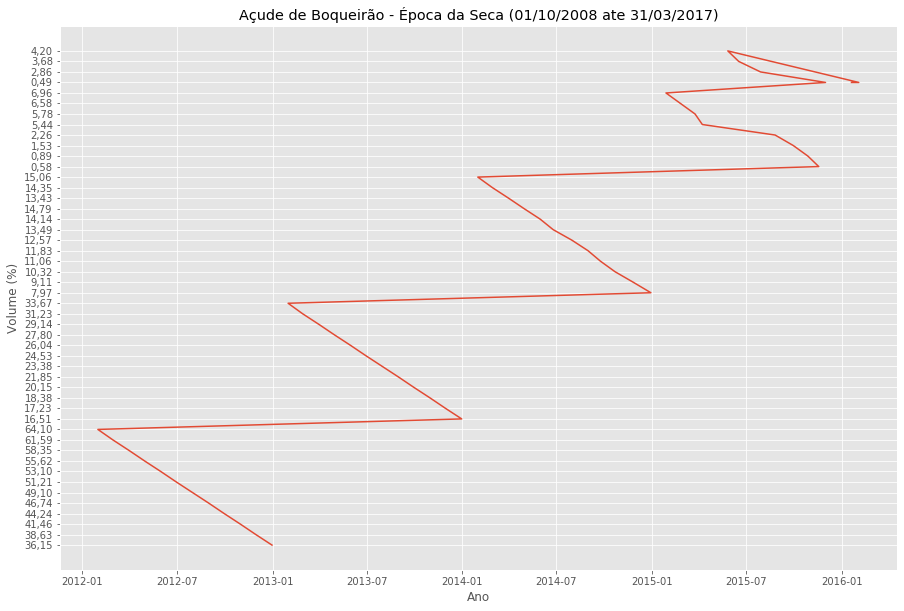

In [54]:
import matplotlib, matplotlib.pyplot as plt

matplotlib.style.use("ggplot")
plt.figure(figsize=(15,10))
plt.plot(df2["Volume (%)"])
# adcionando textos
plt.title("Açude de Cordeiro - Época da Seca (01/10/2008 ate 31/03/2017)")
plt.xlabel("Ano")
plt.ylabel("Volume (%)")
#plt.savefig("Boqueirao-seca.pdf")
plt.show()

In [55]:
print(list(range(1,10)))

[1, 2, 3, 4, 5, 6, 7, 8, 9]


In [56]:
len(df2)

50

In [57]:
365*11

4015

In [58]:
len(df2)

50

In [59]:
# criar uma coluna com os dias
df3 = df2
numero_de_medicoes = len(df3)
df3["mes"] = range(1,numero_de_medicoes+1)
df3.head()

,Volume (%),Volume (m³),Afluência/Defluência (m²),mes
Data do registro,,,,
2012-12-31,"36,15","25.293.451,25","-55.938,75",1
2012-11-30,"38,63","27.027.552,50","-55.938,75",2
2012-10-31,"41,46","29.011.247,50","-64.741,25",3
2012-09-30,"44,24",30.953.485,"-64.741,25",4
2012-08-31,"46,74","32.701.498,75","-64.741,25",5


In [60]:
len(df3) # numero de tuplas ou linhas ou medições

50

In [61]:
df3.tail()

,Volume (%),Volume (m³),Afluência/Defluência (m²),mes
Data do registro,,,,
2015-07-29,"2,86",2.003.815,0,46
2015-06-17,"3,68","2.576.844,20",0,47
2015-05-27,"4,20","2.935.266,20",0,48
2016-02-03,"0,49","345.653,10",0,49
2016-01-20,"0,49","345.653,10",0,50


In [62]:
df3['Volume (%)'] = df3['Volume (%)'].apply(lambda x : float(x.replace(',', '.')))

In [63]:
df3['Volume (%)'][10]

61.59

## Preparar os dados para aplicar o modelo de regressao

In [64]:
import warnings
warnings.filterwarnings('ignore')

import numpy, pandas as pd
import sklearn.linear_model as lm


olm = lm.LinearRegression()
#X = numpy.array([x.toordinal() for x in df3.index])[:, numpy.newaxis]
X = df3['mes'].values.reshape(-1, 1)
y = df3['Volume (%)'].values

In [65]:
X[:5]

array([[1],
       [2],
       [3],
       [4],
       [5]])

In [66]:
y[:5]

array([36.15, 38.63, 41.46, 44.24, 46.74])

## Aplicar o modelo de Regressao

In [67]:
olm.fit(X, y)
olm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Métrica para avaliar o modelo
### R² - coeficiente de determinação.
É uma métrica que mede os o quanto dos futuros examplos são previstos corretamente. <br />
Varia entre 0 e 1. Quanto mais o R² se aproximar de 1, melhor a previsão. <br />
Um R² próximo de 0, não reflete o modelo.

In [68]:
# Predict values
from sklearn.metrics import r2_score

y_pred = olm.predict(df3['mes'].values.reshape(-1,1))
# Evaluate the model
r2 = r2_score(y, y_pred)
print('r2 = ', r2 )

r2 =  0.7176903280041851


### A reta de regressao

In [69]:
a = olm.coef_[0]
b = olm.intercept_
print(' y = {0} * x + {1}'.format(a, b))

 y = -1.0824677070828332 * x + 49.21392653061225


In [70]:
x1 = 112
y_prev = -1.0228873288873288 * x1 + 116.99205077805078
y_prev

2.4286699426699556

In [71]:
x1 = 113
y_prev = -1.0228873288873288 * x1 + 116.99205077805078
y_prev

1.405782613782634

## Plota os dados Previstos e Observados

Equação: y = -1.0824677070828332 * x + 49.21392653061225


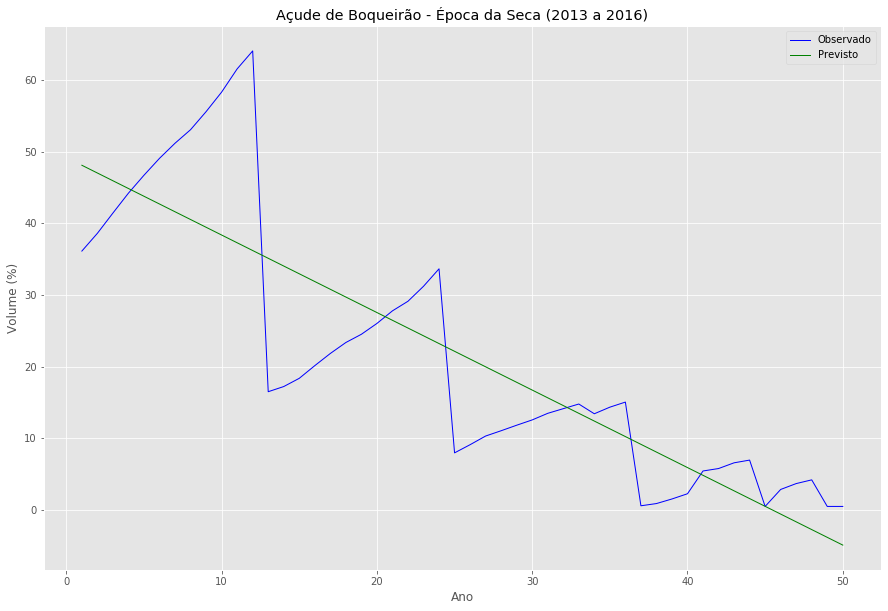

In [72]:
# Plot outputs
matplotlib.style.use("ggplot")
plt.figure(figsize=(15,10))

# Plot both data sets
#plt.scatter(X_test, Y_test,  color='black')
plt.plot(X, y, color='blue',
         linewidth=1)
plt.plot(X, olm.predict(X), color='green',
         linewidth=1)

# Add decorations
plt.title("Açude de Cordeiro - Época da Seca (2013 a 2016)")
plt.xlabel("Ano")
plt.ylabel("Volume (%)")
plt.legend(["Observado", "Previsto",], loc="upper right")

print('Equação: y = {0} * x + {1}'.format(a, b))
plt.show()

## predição futura

In [73]:
numero_de_meses_medicao = len(X)
numero_de_meses_medicao

50

In [74]:
import numpy as np
numero_de_meses_medicao = np.array(numero_de_meses_medicao).reshape(1, -1)
numero_de_meses_medicao

array([[50]])

In [75]:
numero_de_meses_medicao.shape

(1, 1)

In [76]:
# predicao para 30 dias - 1 mes de medicao
#numero_de_meses_medicao = np.array(numero_de_meses_medicao).reshape(1, -1)
pred = olm.predict(numero_de_meses_medicao+1)[0]
print ("Volume Boqueirão depois de um mes = %6.2f %%" % (pred))

Volume Boqueirão depois de um mes =  -5.99 %


In [77]:
# predicao para 60 dias - 2 meses
numero_de_meses_medicao = np.array(numero_de_meses_medicao).reshape(1, -1)
pred = olm.predict(numero_de_meses_medicao+2)[0]
print ("Volume Cordeiro depois de 2 meses = %6.2f %%" % (pred))

Volume Boqueirão depois de 2 meses =  -7.07 %


## predição até acabar a água

In [78]:
numero_de_meses_medicao = np.array(numero_de_meses_medicao).reshape(1, -1)
print("Última observação: 31 de Março de 2017: 3.18% - Volume")
print("Erro de Previsão (mês de Março) : Previsto - Observado = ", \
      "{:.2f}".format(olm.predict(numero_de_meses_medicao)[0] - 3.18) )

print ("\nPrevisão do Volume Cordeiro até Secar - Ano 2017")
meses = 0
nome_meses = [ "Março", "Abril", "Maio", "Junho", "Julho", "Agosto", "Setembro", "Outubro", "Novembro", "Dezembro"]
while (True):
    pred = olm.predict(numero_de_meses_medicao+meses)[0]
    if pred < 0:
        break
    print ("Volume Boqueirão - Mês de %s -> %-5.2f%%" % (nome_meses[meses],pred))
    meses = meses + 1
   # print(meses)
pred = olm.predict(numero_de_meses_medicao+meses)[0]
print ("Volume Cordeiro - Mês de %s  -> %-5.2f%%" % (nome_meses[meses],pred))

Última observação: 31 de Março de 2017: 3.18% - Volume
Erro de Previsão (mês de Março) : Previsto - Observado =  -8.09

Previsão do Volume Boqueirão até Secar - Ano 2017
Volume Boqueirão - Mês de Março  -> -4.91%
